# What this file does

It shows the historical breakdown of race over the past 10 years at community colleges in CT. 

# Findings

The overall population in CCs has decreased, largely driven by the drop in white students in that period.

But this year, the drop in enrollment is primarily driven by a drop in Hispanic enrollees, followed by Black enrollees.

The drop in Hispanic enrollment at present comes after a decade comprising mostly of increases in their enrollment. The drop in Black enrollment at present comes after decreases in enrollment in recent years.

# Tools

In [ ]:
import pandas as pd

# Read race data and clean it

Only from 2010 onwards bc the categories avaliable changed with the 2010 census. 

In [2]:
df = pd.read_csv('community_colleges_race_gender.csv')

In [3]:
new_df = df.melt(id_vars=['Institution Name', 'UnitID'])

In [4]:
new_df['Year'] = new_df.variable.str.extract(r'.*EF(\d\d\d\d)').astype(float)

In [13]:
new_df[new_df['Year']==2018]

,Institution Name,UnitID,variable,value,Year
0,Asnuntuck Community College,128577,Grand total (EF2018A All students total),1858.0,2018.0
1,Capital Community College,129367,Grand total (EF2018A All students total),3290.0,2018.0
2,Gateway Community College,130396,Grand total (EF2018A All students total),7016.0,2018.0
3,Housatonic Community College,129543,Grand total (EF2018A All students total),5012.0,2018.0
4,Manchester Community College,129695,Grand total (EF2018A All students total),6003.0,2018.0
...,...,...,...,...,...
331,Northwestern Connecticut Community College,130040,Nonresident alien women (EF2018A All students...,0.0,2018.0
332,Norwalk Community College,130004,Nonresident alien women (EF2018A All students...,91.0,2018.0
333,Quinebaug Valley Community College,130217,Nonresident alien women (EF2018A All students...,0.0,2018.0
334,Three Rivers Community College,129808,Nonresident alien women (EF2018A All students...,7.0,2018.0


# Asian

In [72]:
df_asian = pd.DataFrame(new_df[new_df['variable'].str.contains('Asian total')==True].groupby(by='Year')['value'].sum()).rename(columns = 
                                                                                                                   {
                                                                                                                       'value': 'Asian total'})
df_asian.to_csv('asian_enrollment.csv')                                                                                                                   

<AxesSubplot:xlabel='Year'>

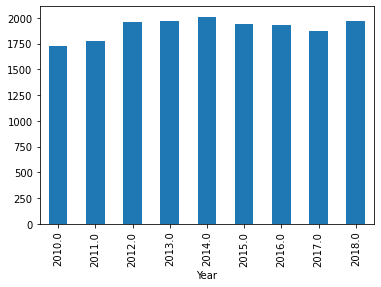

In [24]:
new_df[new_df['variable'].str.contains('Asian total')==True].groupby(by='Year')['value'].sum().plot(kind='bar')

# White

In [73]:
df_white = pd.DataFrame(new_df[new_df['variable'].str.contains('White total')==True].groupby(by='Year')['value'].sum()).rename(columns = 
                                                                                                                   {
                                                                                                                       'value': 'White total'})

df_white.to_csv('white_enrollment.csv')                                                        

<AxesSubplot:xlabel='Year'>

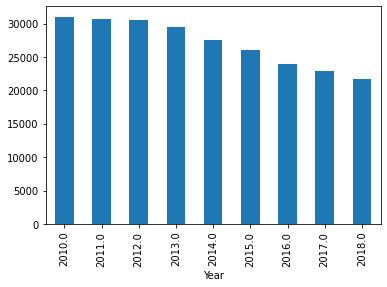

In [25]:
new_df[new_df['variable'].str.contains('White total')==True].groupby(by='Year')['value'].sum().plot(kind='bar')

# Black

In [74]:
df_black = pd.DataFrame(new_df[new_df['variable'].str.contains('African American total')==True].groupby(by='Year')['value'].sum()).rename(columns = 
                                                                                                                   {
                                                                                                                       'value': 'Black total'})

df_black.to_csv('black_enrollment.csv')                                                        

<AxesSubplot:xlabel='Year'>

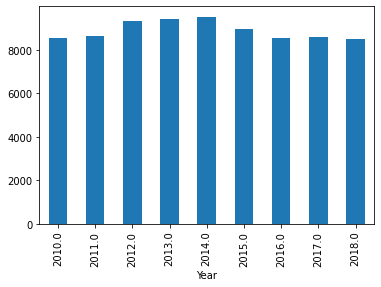

In [22]:
new_df[new_df['variable'].str.contains('African American total')==True].groupby(by='Year')['value'].sum().plot(kind='bar')

# Hispanic

In [75]:
df_hisp = pd.DataFrame(new_df[new_df['variable'].str.contains('Hispanic total')==True].groupby(by='Year')['value'].sum()).rename(columns = 
                                                                                                                   {
                                                                                                                       'value': 'Hispanic total'})

df_hisp.to_csv('hisp_enrollment.csv')                                                        

<AxesSubplot:xlabel='Year'>

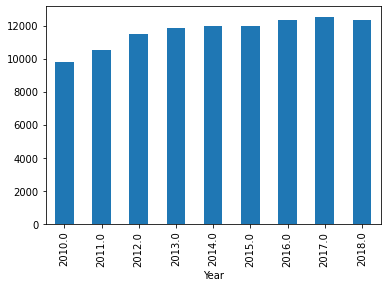

In [21]:
new_df[new_df['variable'].str.contains('Hispanic total')==True].groupby(by='Year')['value'].sum().plot(kind='bar')

# Further cleaning

Added 2019 data from https://www.ct.edu/files/opr/WEB%20Enrollment-by-Race-Ethnicity-through-F2019.pdf essentially manually bc easier than scraping

# Calculating percentages

In [110]:
df_all = pd.DataFrame(new_df[new_df['variable'].str.contains('Grand total')==True].groupby(by='Year')['value'].sum()).rename(columns = 
                                                                                                                   {
                                                                                                                       'value': 'total'})

df_all.to_csv('all_enrollment.csv')                                                        

<AxesSubplot:xlabel='Year'>

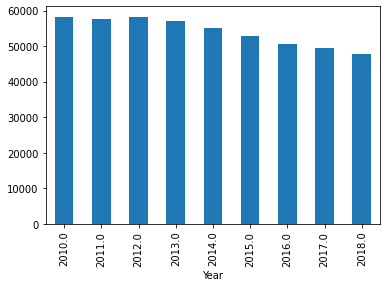

In [20]:
new_df[new_df['variable'].str.contains('Grand total')==True].groupby(by='Year')['value'].sum().plot(kind='bar')

In [131]:
df_asian = pd.read_csv('asian_enrollment.csv')

In [132]:
df_white = pd.read_csv('white_enrollment.csv')

In [133]:
df_black = pd.read_csv('black_enrollment.csv')

In [134]:
df_hisp = pd.read_csv('hisp_enrollment.csv')

In [135]:
df_all = pd.read_csv('all_enrollment.csv')

In [136]:
df_asian = df_asian.merge(df_all, left_on='Year', right_on='Year')

In [137]:
df_white = df_white.merge(df_all, left_on='Year', right_on='Year')

In [138]:
df_black = df_black.merge(df_all, left_on='Year', right_on='Year')

In [139]:
df_hisp = df_hisp.merge(df_all, left_on='Year', right_on='Year')

In [140]:
df_asian['%_asian'] = 100*df_asian['Asian total']/df_asian['total']

In [141]:
df_white['%_white'] = 100*df_white['White total']/df_white['total']

In [142]:
df_black['%_black'] = 100*df_black['Black total']/df_black['total']

In [143]:
df_hisp['%_hisp'] = 100*df_hisp['Hispanic total']/df_hisp['total']

In [150]:
df_final_2 = df_asian.merge(df_white, left_on='Year', right_on='Year').merge(df_black, left_on='Year', right_on='Year').merge(df_hisp, left_on='Year', right_on='Year')

In [151]:
df_final = df_final_2[['Year','%_white', '%_black', '%_hisp', '%_asian']]

# Racial composition over time

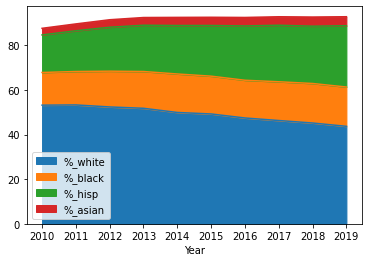

In [148]:
ax = df_final.plot.area(x='Year')
ax.set_xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,2019])

In [157]:
df_final_2.drop(columns={'total_x'}).rename(columns={'total_y':'total'}).drop_duplicates(subset=['total'], keep='last')

,Year,Asian total,%_asian,White total,total,%_white,Black total,%_black,Hispanic total,total,%_hisp
0,2010.0,1727.0,2.964654,31005.0,58253.0,53.224727,8537.0,14.655039,9815.0,58253.0,16.848918
1,2011.0,1773.0,3.074176,30753.0,57674.0,53.322121,8648.0,14.994625,10542.0,57674.0,18.278600
2,2012.0,1960.0,3.366078,30523.0,58228.0,52.419798,9343.0,16.045545,11477.0,58228.0,19.710449
3,2013.0,1969.0,3.455780,29524.0,56977.0,51.817400,9400.0,16.497885,11832.0,56977.0,20.766274
4,2014.0,2010.0,3.644341,27547.0,55154.0,49.945607,9520.0,17.260761,11996.0,55154.0,21.750009
5,2015.0,1944.0,3.684540,25996.0,52761.0,49.271242,8946.0,16.955706,11998.0,52761.0,22.740282
6,2016.0,1926.0,3.810240,23994.0,50548.0,47.467753,8556.0,16.926486,12315.0,50548.0,24.362982
7,2017.0,1877.0,3.801134,22878.0,49380.0,46.330498,8584.0,17.383556,12526.0,49380.0,25.366545
8,2018.0,1970.0,4.111962,21661.0,47909.0,45.212799,8494.0,17.729445,12315.0,47909.0,25.704982
9,2019.0,1821.0,4.033401,19742.0,45148.0,43.727297,7959.0,17.628688,12419.0,45148.0,27.507309


# % decrease within races

In [ ]:
#What we know:
#17% decline in Black students -> -1353 -> leaves us with 6924 (approx)
#16% decline in Latino students -> -1987 -> 10432 (approx)
#11% decline overall -> -4966 students -> 40182

# => (White population cannot have decreased by more than 13%)
# => Decrease in overall enrollment this year is driven by decreased Hispanic enrollees, followed by Blakc enrolles

In [162]:
df_black['pct_change_black'] = 100*df_black['Black total'].pct_change()

In [163]:
df_hisp['pct_change_hisp'] = 100*df_hisp['Hispanic total'].pct_change()

# Hispanic % change historically

Drop in Hispanic enrollment at present comes after a decade comprising mostly of increases in their enrollment.

<AxesSubplot:xlabel='Year'>

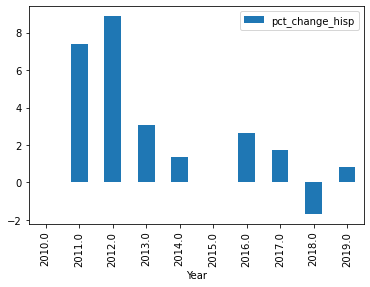

In [164]:
df_hisp.plot(x='Year', y='pct_change_hisp', kind='bar')

# Black % change historically

Drop in Black enrollment at present comes after drops in enrollment in recent years.

<AxesSubplot:xlabel='Year'>

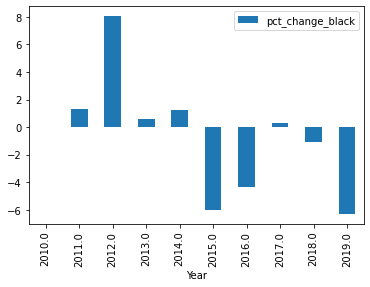

In [165]:
df_black.plot(x='Year', y='pct_change_black', kind='bar')